# Linear and Logistic Regression

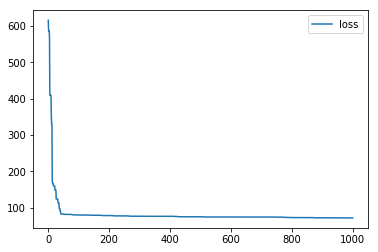

validation loss 63.518470834094764
sklearn 20.747143360308737


In [98]:
import numpy as np, matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_validation import train_test_split
np.random.seed(42)

boston = datasets.load_boston()

X = boston['data']
y = boston['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# we change the optimizer a bit, so that it can handle a list of param vectors
# we also are no longer keeping track of 
def random_opt(X, y, layer, loss, lr=0.1, num_iters=40):
    prev_val = loss(layer.run(X, layer.params()), y)
    loss_history = [prev_val]
    for _ in range(num_iters):
        # we create list of samples, here from a normal distribution
        # with zero mean and standard deviation of our learning rate
        samples = [np.random.normal(scale=lr, size=p.shape) for p in layer.params()]
        new_params = [p + s for p, s in zip(layer.params(), samples)]
        # we measure the improvement
        improvement = prev_val - loss(layer.run(X, new_params), y)

        # apply update if it improves performance
        if improvement >= 0.0:
            for p, s in zip(layer.params(), samples):
                p += s

        prev_val = loss(layer.run(X, layer.params()), y)

        loss_history.append(prev_val)
        
    return loss_history


class LinearRegression():
    def __init__(self, size):
        self.W = np.zeros(size)
        self.b = np.array(0.0)
    
    def run(self, X, params):
        return X.dot(params[0]) + params[1]
    
    def params(self):
        return [self.W, self.b]
    
# the loss function or objective function
# this is the function which we want to minimize
def mse(y_true, y_pred):
    return np.average(np.square(y_true - y_pred))

linear_regression = LinearRegression(X.shape[1])
training_loss = random_opt(X_train, y_train, linear_regression, mse, lr=0.005, num_iters=1000)

loss_line, = plt.plot(training_loss, label='loss')
plt.legend(handles=[loss_line])
plt.show()
print("validation loss", mse(linear_regression.run(X_test, linear_regression.params()), y_test))

from sklearn.linear_model import LinearRegression

linear_regression_2 = LinearRegression()

linear_regression_2.fit(X_train, y_train)

print("sklearn", mse(linear_regression_2.predict(X_test), y_test))
